In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import xgboost as xgb
from prophet import Prophet

Matplotlib is building the font cache; this may take a moment.
c:\MLTP\Sales\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [11]:
df=pd.read_csv("Sample - Superstore.csv", encoding='windows-1252')

In [9]:
!pip install numpy pandas matplotlib seaborn scikit-learn imbalanced-learn xgboost prophet


  Using cached numpy-2.2.5-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached prophet-1.1.6-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp313-cp313-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  U

In [12]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [14]:
df.head(6)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.to_period('M')

In [ ]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Order Year       0
Order Month      0
dtype: int64


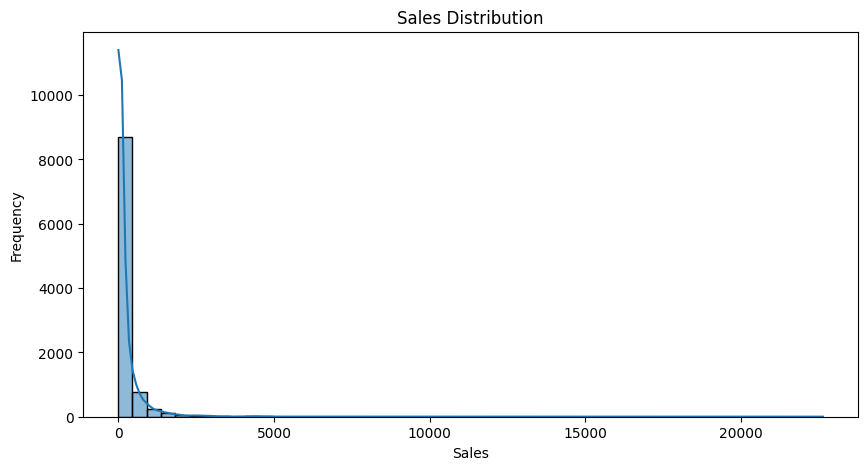

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

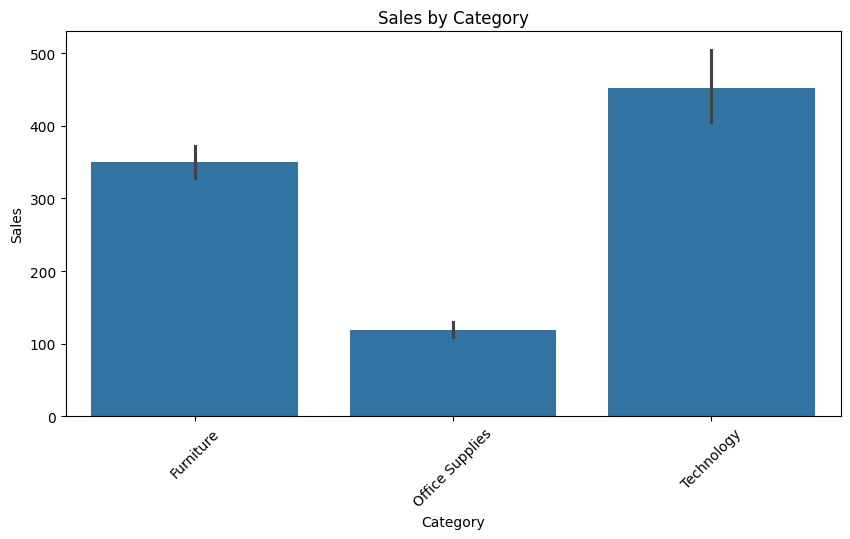

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Sales', data=df)
plt.title('Sales by Category')
plt.xticks(rotation=45)
plt.show()

In [18]:
monthly_sales = df.groupby('Order Month')['Sales'].sum()
plt.figure(figsize=(14, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'Order Month'

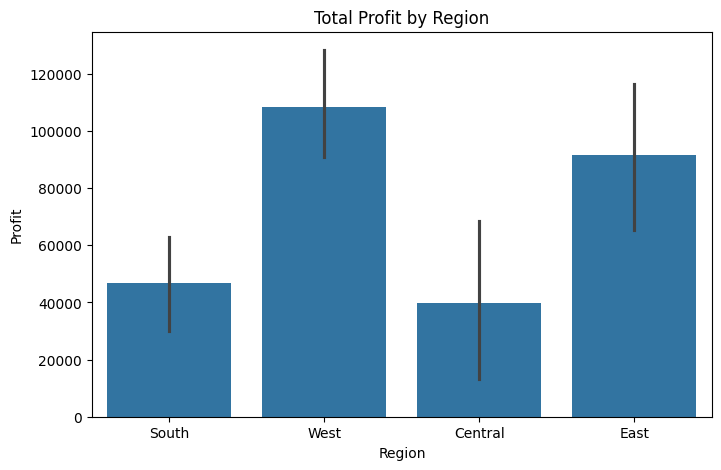

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Profit', data=df, estimator=sum)
plt.title('Total Profit by Region')
plt.ylabel('Profit')
plt.show()


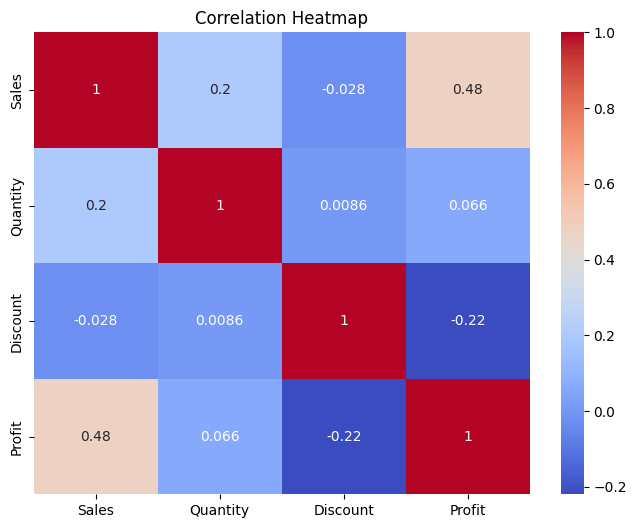

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


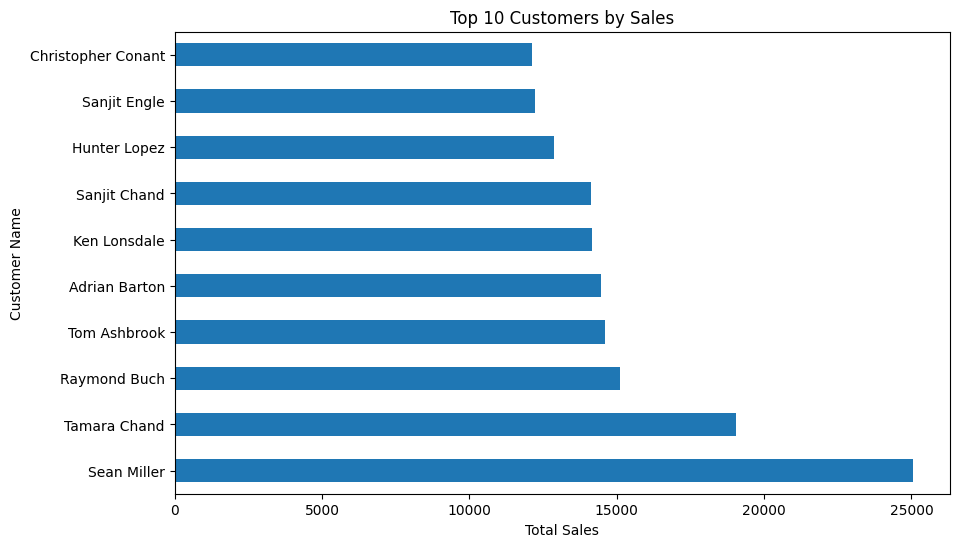

In [21]:
top_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(10)
top_customers.plot(kind='barh', figsize=(10, 6), title='Top 10 Customers by Sales')
plt.xlabel('Total Sales')
plt.show()

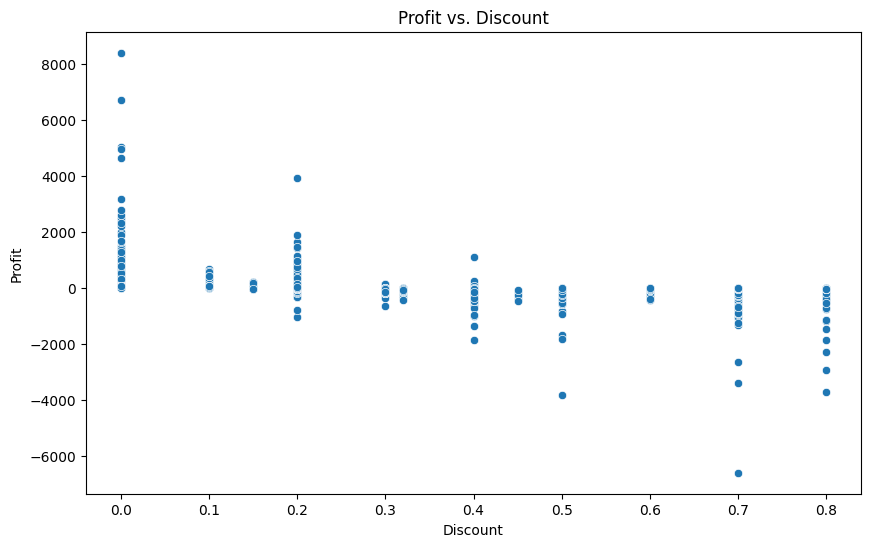

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Profit vs. Discount')
plt.show()

15:35:44 - cmdstanpy - INFO - Chain [1] start processing
15:35:46 - cmdstanpy - INFO - Chain [1] done processing


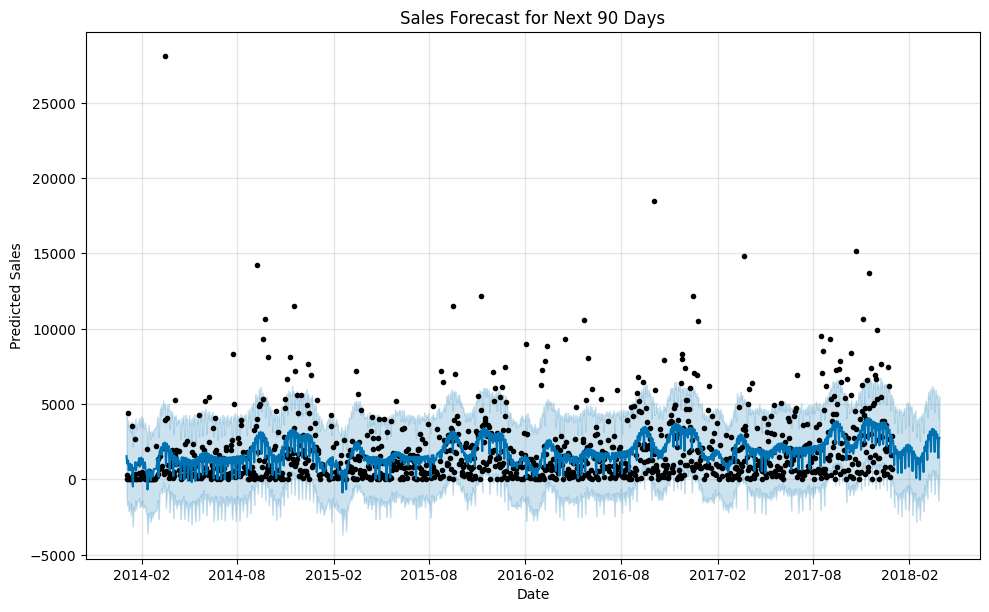

             ds         yhat   yhat_lower   yhat_upper
1317 2018-03-21  1828.030371  -966.418043  4477.432246
1318 2018-03-22  2982.044124   298.728726  5703.659243
1319 2018-03-23  3196.196296   562.537361  5933.149633
1320 2018-03-24  2742.691074   124.990929  5433.451519
1321 2018-03-25  2865.201659    61.671784  5404.999667
1322 2018-03-26  3010.493320   332.985502  5639.199460
1323 2018-03-27  2362.509600  -443.450022  5161.040122
1324 2018-03-28  1429.371918 -1383.340156  4117.413550
1325 2018-03-29  2562.024115  -468.412288  5189.897789
1326 2018-03-30  2763.839775   202.359242  5524.151223


In [23]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales.columns = ['ds', 'y']

# Train Prophet model
model = Prophet()
model.fit(daily_sales)

# Forecast 90 future days
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Sales Forecast for Next 90 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.show()

# Show last few forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

In [24]:
# Step 1: Aggregate actual sales monthly
monthly_actual = df.resample('M', on='Order Date')['Sales'].sum()
test_actual = monthly_actual[-6:]

# Step 2: Reset and check forecast DataFrame
forecast_df = forecast[['ds', 'yhat']].copy()  # make sure 'ds' and 'yhat' exist
forecast_df['ds'] = pd.to_datetime(forecast_df['ds'])  # ensure datetime format
forecast_df.set_index('ds', inplace=True)

# Step 3: Aggregate Prophet forecast monthly
monthly_pred = forecast_df['yhat'].resample('M').sum()
test_pred = monthly_pred[-6:]

# Step 4: Calculate metrics
rmse = np.sqrt(mean_squared_error(test_actual, test_pred))
mae = mean_absolute_error(test_actual, test_pred)
mape = np.mean(np.abs((test_actual - test_pred) / test_actual)) * 100

# Step 5: Print results
print("\n🔹 Prophet Forecast Evaluation (Last 6 Months):")
print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"MAPE : {mape:.2f}%")


C:\Users\tata\AppData\Local\Temp\ipykernel_26396\3759542804.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_actual = df.resample('M', on='Order Date')['Sales'].sum()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

<ipython-input-20-c7260a56591c>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


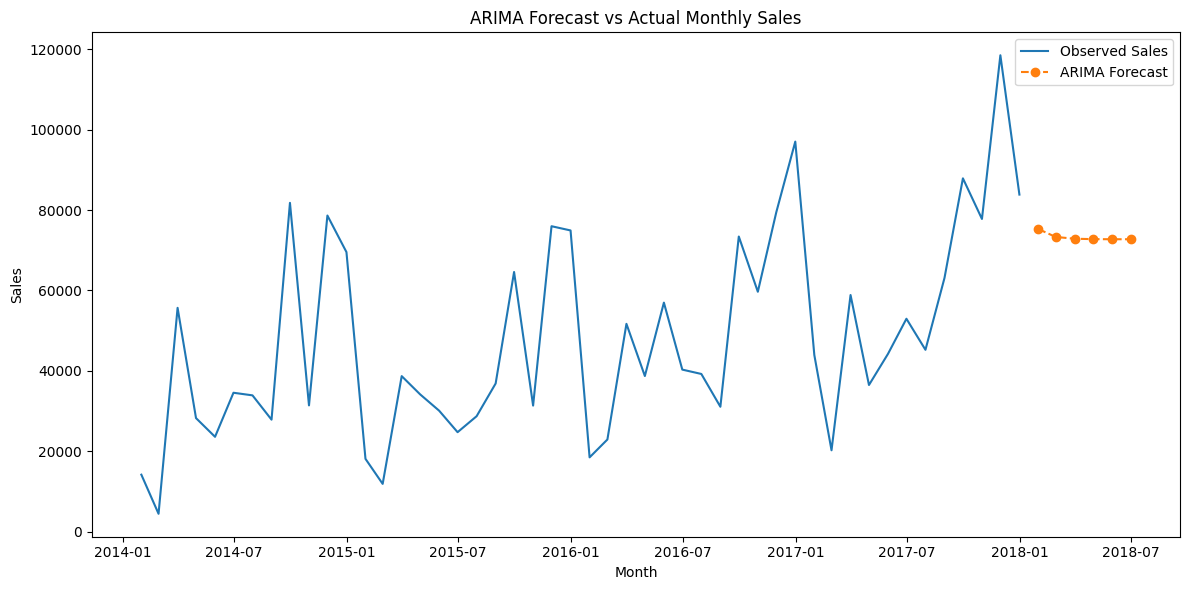

Forecasted Monthly Sales:
2018-01-31    75259.028221
2018-02-28    73306.800167
2018-03-31    72862.101783
2018-04-30    72760.803857
2018-05-31    72737.729184
2018-06-30    72732.473000
Freq: ME, Name: predicted_mean, dtype: float64

🔹 ARIMA Forecast Evaluation (Last 6 Months):
RMSE : 37548.42
MAE  : 31473.12
MAPE : 35.31%


In [ ]:
# Aggregate sales monthly
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

# Fit ARIMA(1,1,1) model
model = ARIMA(monthly_sales, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 6 months
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)

# Plot actual and forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Observed Sales')
plt.plot(forecast.index, forecast.values, label='ARIMA Forecast', linestyle='--', marker='o')
plt.title('ARIMA Forecast vs Actual Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

# Show forecasted values
print("Forecasted Monthly Sales:")
print(forecast)

# Step 1: Split into train/test (last 6 months = test)
train = monthly_sales[:-6]
test = monthly_sales[-6:]

# Step 2: Fit ARIMA on training data
model_eval = ARIMA(train, order=(1, 1, 1)).fit()

# Step 3: Forecast 6 months ahead
forecast_eval = model_eval.forecast(steps=6)

# Step 4: Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(test, forecast_eval))
mae = mean_absolute_error(test, forecast_eval)
mape = np.mean(np.abs((test - forecast_eval) / test)) * 100

# Step 5: Print results
print("\n🔹 ARIMA Forecast Evaluation (Last 6 Months):")
print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"MAPE : {mape:.2f}%")


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Order Month: period[M]